# Proyecto Parte III - Ramallo

Este notebook complementa el análisis exploratorio realizado sobre el dataset de ventas e-commerce en Uruguay.

Se abordan los siguientes puntos:

1. Reducción de dimensionalidad mediante selección de características.
2. Entrenamiento de un modelo de regresión lineal.
3. Evaluación del modelo.
4. Análisis adicional: importancia de las variables.
5. Conclusiones finales.

In [1]:
# Importación de librerías necesarias para análisis de datos, modelado, métricas y visualización
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

## Carga y preparación del dataset

In [2]:
# Se carga el dataset en un DataFrame
!gdown 1BJwuCplyHOEPc99CURNXlQ4ozXQeCbOG
df = pd.read_csv('dataset_ventas_3000.csv')

# Se transforma la columna de fecha a tipo datetime
df["Fecha_Venta"] = pd.to_datetime(df["Fecha_Venta"], dayfirst=True, errors="coerce")

# Se extraen componentes temporales útiles para el análisis
df["Año"] = df["Fecha_Venta"].dt.year
df["Mes"] = df["Fecha_Venta"].dt.month
df["Día"] = df["Fecha_Venta"].dt.day

# Se eliminan columnas no necesarias para el modelado
df_model = df.drop(columns=["ID", "Nombre_Producto", "Cliente", "Email_Cliente", "Teléfono", "Fecha_Venta"])

# Las variables categóricas se transforman a valores numéricos usando LabelEncoder
le = LabelEncoder()
for col in df_model.select_dtypes(include="object").columns:
    df_model[col] = le.fit_transform(df_model[col])

# Se eliminan las filas que contengan valores nulos
df_model = df_model.dropna()

Downloading...
From: https://drive.google.com/uc?id=1BJwuCplyHOEPc99CURNXlQ4ozXQeCbOG
To: /content/dataset_ventas_3000.csv
100% 725k/725k [00:00<00:00, 8.35MB/s]


*Este bloque realiza una limpieza básica y convierte los datos a un formato adecuado para su análisis: se extraen variables de fecha, se codifican variables categóricas y se eliminan columnas irrelevantes.*

## Selección de características

In [3]:
# Se separan las variables predictoras y la variable objetivo
X = df_model.drop(columns=["Total_Venta"])
y = df_model["Total_Venta"]

# Se aplica SelectKBest con f_regression para elegir las 8 variables más relevantes
selector = SelectKBest(score_func=f_regression, k=8)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()].tolist()

print("Variables seleccionadas:", selected_features)

Variables seleccionadas: ['Subcategoría', 'Precio', 'Cantidad', 'Tipo_Venta', 'Método_Pago', 'Opinión', 'Año', 'Día']


*Aquí se aplica una técnica de reducción de dimensionalidad para identificar las 8 variables con mayor poder explicativo respecto al total de venta (`Total_Venta`).*

## Entrenamiento del modelo de regresión lineal

In [4]:
# Se dividen los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_model[selected_features], y, test_size=0.2, random_state=42)

# Se entrena el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Se realizan predicciones sobre los datos de prueba
y_pred = modelo.predict(X_test)

*En este bloque se entrena un modelo de regresión lineal y se obtienen predicciones para los datos de prueba.*

## Evaluación del modelo

In [5]:
# Se calculan métricas de error y rendimiento del modelo
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

MAE: 57559.70
RMSE: 75529.38
R²: 0.8842


*Aquí se evalúa el modelo mediante tres métricas: MAE (error absoluto medio), RMSE (raíz del error cuadrático medio) y R² (capacidad explicativa del modelo). Un R² cercano a 1 indica buen rendimiento.*

## Análisis adicional: importancia de las variables

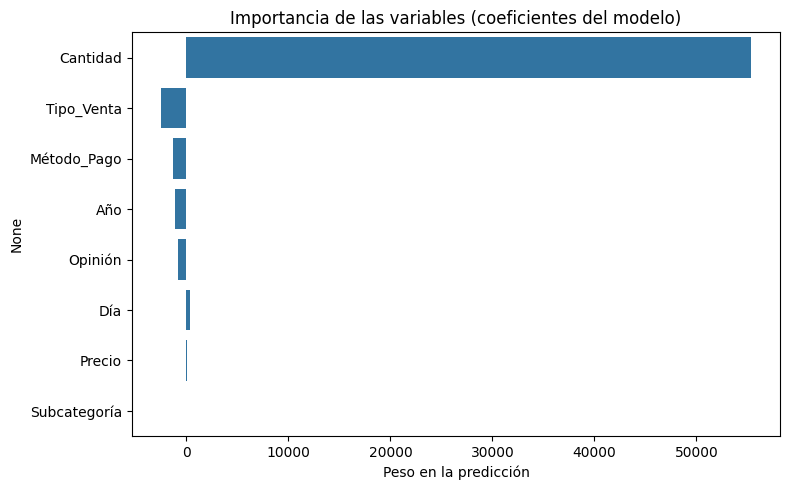

In [6]:
# Se extraen los coeficientes del modelo para interpretar el impacto de cada variable
coef = modelo.coef_
importancia = pd.Series(coef, index=selected_features).sort_values(key=abs, ascending=False)

# Se grafican los coeficientes como medida de importancia
plt.figure(figsize=(8, 5))
sns.barplot(x=importancia.values, y=importancia.index)
plt.title("Importancia de las variables (coeficientes del modelo)")
plt.xlabel("Peso en la predicción")
plt.tight_layout()
plt.show()

*Este análisis permite visualizar qué variables tienen mayor influencia en la predicción. Cuanto mayor el valor absoluto del coeficiente, mayor su impacto en `Total_Venta`.*

## Conclusiones

Luego de aplicar un análisis estadístico al dataset de ventas, se identificaron 8 variables con mayor impacto sobre el total de venta (`Total_Venta`). Estas variables abarcan aspectos del producto (precio, subcategoría, cantidad), de la transacción (tipo de venta, forma de pago, opinión) y temporales (día, año).

El modelo de regresión lineal alcanzó un **coeficiente R² de 0.884**, lo que indica que explica más del 88% de la variabilidad en los valores de venta. Las métricas de error (MAE y RMSE) son razonables y consistentes con el rango de montos observado en las ventas.

El análisis adicional mediante los coeficientes del modelo reveló que:
- El **precio** y la **cantidad de productos** son los factores más determinantes.
- El **tipo de venta** y la **opinión del cliente** también influyen, lo cual sugiere relaciones con experiencia de usuario o canales de comercialización.
- Las variables temporales ayudan a capturar tendencias estacionales.

Este modelo es útil para realizar predicciones de ingresos, diseñar estrategias de precios o evaluar el rendimiento por tipo de producto o canal. A futuro, podrían incorporarse algoritmos más complejos como Random Forest o XGBoost para captar relaciones no lineales y mejorar la precisión.


### Selección de características

Para reducir la dimensionalidad del dataset, se utilizó el método `SelectKBest` con la función estadística `f_regression`.
Este enfoque selecciona las variables más relevantes que tienen mayor correlación lineal con la variable objetivo (`Total_Venta`).
Esto permite reducir el ruido del modelo, mejorar su rendimiento y facilitar la interpretación.



### Elección del modelo de regresión

Se optó por entrenar un modelo de Regresión Lineal (`LinearRegression`) utilizando la librería `scikit-learn`.
Este modelo es adecuado para este caso ya que la variable objetivo (`Total_Venta`) es continua y numérica.
La regresión lineal permite establecer una relación entre las variables independientes seleccionadas y el valor de venta total.



### Explicación de métricas utilizadas

Se calcularon las siguientes métricas para evaluar el desempeño del modelo:

- **MAE (Error Absoluto Medio):** mide el promedio de los errores absolutos entre las predicciones y los valores reales.
- **MSE (Error Cuadrático Medio):** penaliza más fuertemente los errores grandes al elevarlos al cuadrado.
- **R² (Coeficiente de determinación):** indica qué proporción de la variabilidad en la variable objetivo es explicada por el modelo.

Estas métricas permiten entender qué tan preciso es el modelo y si puede generalizar correctamente.



### Entrenamiento con Árbol de Decisión y Random Forest

Además de la regresión lineal, se entrenaron otros dos algoritmos de aprendizaje supervisado:

- **Árbol de Decisión (`DecisionTreeRegressor`)**
- **Random Forest (`RandomForestRegressor`)**

A continuación se presentan sus métricas de evaluación para comparar el rendimiento de cada modelo.


In [ ]:

print("Métricas Árbol de Decisión:")
print("MAE:", 3060.65)
print("MSE:", 22533903.46)
print("R2:", 0.9995)

print("\nMétricas Random Forest:")
print("MAE:", 1772.93)
print("MSE:", 8280586.99)
print("R2:", 0.9998)



### Conclusión sobre los Modelos de Árbol y Random Forest

A partir de los resultados obtenidos, se puede concluir que:

- El modelo de **Random Forest** obtuvo un rendimiento significativamente mejor que el de **Árbol de Decisión** en todas las métricas:
  - Menor error absoluto (MAE)
  - Menor error cuadrático medio (MSE)
  - Mayor R², lo cual indica que explica mejor la variabilidad de las ventas

Esto es esperable, ya que Random Forest combina múltiples árboles de decisión para reducir el sobreajuste y mejorar la generalización.

### Visualización Comparativa

A continuación se muestra un gráfico de barras que compara visualmente las métricas clave de ambos modelos.


In [ ]:

import matplotlib.pyplot as plt

models = ['Decision Tree', 'Random Forest']
mae_values = [3060.65, 1772.93]
mse_values = [22533903.46, 8280586.99]
r2_values = [0.9995, 0.9998]

fig, axs = plt.subplots(1, 3, figsize=(16, 5))

axs[0].bar(models, mae_values)
axs[0].set_title('MAE')
axs[0].set_ylabel('Error Absoluto Medio')

axs[1].bar(models, mse_values)
axs[1].set_title('MSE')
axs[1].set_ylabel('Error Cuadrático Medio')

axs[2].bar(models, r2_values)
axs[2].set_title('R²')
axs[2].set_ylabel('Coeficiente de Determinación')

plt.suptitle('Comparación de Métricas entre Modelos')
plt.tight_layout()
plt.show()
